In [2]:
# 학습된 모델 불러다 다시 사용
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
# 신경망 구조와 가중치를 저장하고 있는  파일을 읽어옴
cnn = tf.keras.models.load_model("/content/cnn1.h5")
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [4]:
# 데이터 확보
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170508288/170498071 [==============================] - 6s 0us/step


In [5]:
res = cnn.evaluate(x_test,y_test,verbose=2)
res

313/313 - 6s - loss: 0.6646 - accuracy: 0.7849 - 6s/epoch - 20ms/step


[0.6645742058753967, 0.7849000096321106]

In [6]:
# [0.664574146270752, 0.7849000096321106]

In [7]:
cnn.layers

In [11]:
[i.name for i in cnn.layers]

['conv2d',
 'conv2d_1',
 'max_pooling2d',
 'dropout',
 'conv2d_2',
 'conv2d_3',
 'max_pooling2d_1',
 'dropout_1',
 'flatten',
 'dense',
 'dropout_2',
 'dense_1']

In [12]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases =  layer.get_weights()
    print(layer.name, kernel.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


In [27]:
#맨 앞의 있는 컨볼류션층의 커널 정보를 추출
kernel, biases =  cnn.layers[0].get_weights()

In [16]:
minv, maxv =  kernel.min(),kernel.max()

In [30]:
# 커널의 값을 표준화  minmax scaler
kernel = (kernel - minv ) / (maxv - minv)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
kernel.shape

(3, 3, 3, 32)

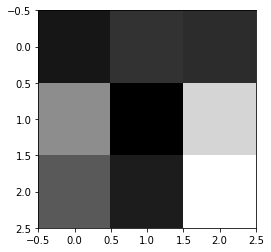

In [38]:

# temp = kernel[:,:,0,0] ~ temp = kernel[:,:,0,31]
temp = kernel[:,:,0,0]
plt.imshow(temp,cmap='gray')

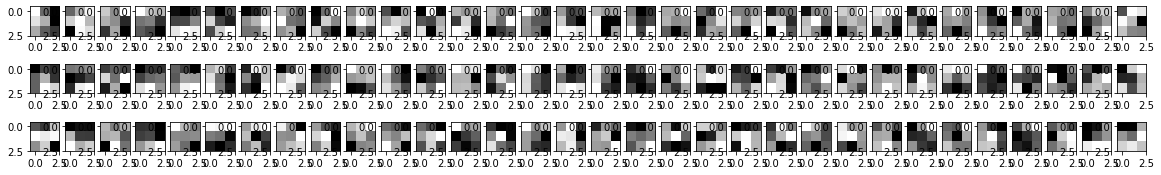

In [50]:
# (3, 3, 3, 32)
# fig,ax =  plt.subplots(3,32,figsize=(10,10) )
plt.figure(figsize=(20,3))
for i in range(32):  
  f = kernel[:,:,:,i]
  for j in range(3):    
    plt.subplot(3,32,j*32+i+1)
    temp = f[:,:,j]
    plt.imshow(temp,cmap='gray')



In [48]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases =  layer.get_weights()
    print(layer.name, kernel.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


In [ ]:
for i in range(32):
  for j in range(3):
    print(j*32+i+1)

In [51]:
# 신경망의 특징 맵을 시각화
for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name, layer.output.shape)

conv2d (None, 30, 30, 32)
conv2d_1 (None, 28, 28, 32)
conv2d_2 (None, 12, 12, 64)
conv2d_3 (None, 10, 10, 64)


In [52]:
# 0번째 층을 따로 테어내서 객체에 저장
from tensorflow.keras.models import Model

In [54]:
m =  Model(inputs = cnn.inputs, outputs=cnn.layers[0].output)
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [56]:
freature_map = m.predict(x_test)